In [1]:
import pandas as pd
# Cargar los datos
data= pd.read_csv('prueba_piloto2.csv', encoding='latin-1')  # Se especifica la codificación latin-1
data.head()  # Ver las primeras filas del dataset

,Rol,Género,Edad,Años en la institución,Área o Departamento,Carrera,Ambiente seguro,Testigo de violencia,Frecuencia de violencia,Violencia fí1ca,Acoso sexual,Violencia verbal,Reporte incidente,Acción de la institución,Programas preventivos,Más medidas de seguridad,Desvalorización de su trabajo,Sobrecarga intencional de trabajos,difamación dentro de la institución,humillación pública
0,1,1,1,3,4,1,2,1,3,2,1,1,2,0,3,1,1,2,1,1
1,1,2,1,2,4,7,1,1,4,1,1,1,2,0,3,2,1,2,1,1
2,1,2,1,1,4,7,2,1,3,2,2,2,2,0,1,1,2,2,2,1
3,1,1,1,2,4,5,1,1,3,1,2,1,1,2,3,1,1,2,1,2
4,2,2,3,4,3,11,1,1,4,1,2,2,1,1,1,1,2,1,2,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Crear una nueva variable binaria que combine todas las formas de violencia
data['Violencia_general'] = (
    (data['Violencia fí1ca'] == 1) |
    (data['Acoso sexual'] == 1) |
    (data['Violencia verbal'] == 1) |
    (data[' difamación dentro de la institución'] == 1) |
    (data['humillación pública'] == 1) |
    (data['Desvalorización de su trabajo'] == 1) |
    (data['Sobrecarga intencional de trabajos'] == 1)
).astype(int)

# Eliminar las columnas de violencia individuales y usar "Violencia_general" como objetivo
X = data.drop(columns=['Violencia fí1ca', 'Violencia_general'])
y = data['Violencia_general']

# Dividir en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense # Import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # Import the metrics functions


# Cambiar la forma de los datos para CNN: (samples, timesteps, features)
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Crear el modelo CNN
model_cnn = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Hacer predicciones
y_pred_cnn = (model_cnn.predict(X_test_cnn) > 0.5).astype("int32")

# Calcular las métricas
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
precision_cnn = precision_score(y_test, y_pred_cnn)
recall_cnn = recall_score(y_test, y_pred_cnn)
f1_cnn = f1_score(y_test, y_pred_cnn)
roc_auc_cnn = roc_auc_score(y_test, y_pred_cnn)

# Mostrar los resultados
print(f"Accuracy: {accuracy_cnn}")
print(f"Precision: {precision_cnn}")
print(f"Recall: {recall_cnn}")
print(f"F1-Score: {f1_cnn}")
print(f"AUC-ROC: {roc_auc_cnn}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9219 - loss: 0.3473 - val_accuracy: 0.9773 - val_loss: 0.1103
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9870 - loss: 0.0800 - val_accuracy: 0.9773 - val_loss: 0.1107
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9922 - loss: 0.0476 - val_accuracy: 0.9773 - val_loss: 0.1010
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9810 - loss: 0.0913 - val_accuracy: 0.9773 - val_loss: 0.0906
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9875 - loss: 0.0577 - val_accuracy: 0.9773 - val_loss: 0.0847
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9853 - loss: 0.0583 - val_accuracy: 0.9773 - val_loss: 0.0779
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9866 - loss: 0.0468 - val_accuracy: 0.9773 - val_loss: 0.0711
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9836 - loss: 0.0463 - val_accuracy: 0.9773 - val_loss: 0.0634

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


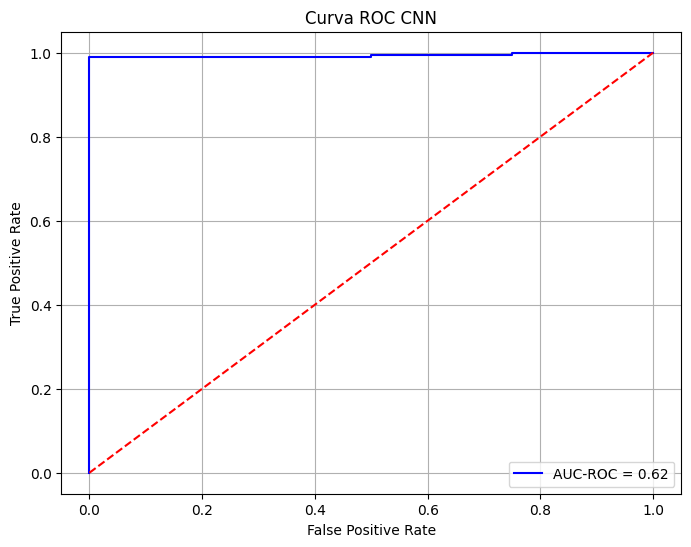

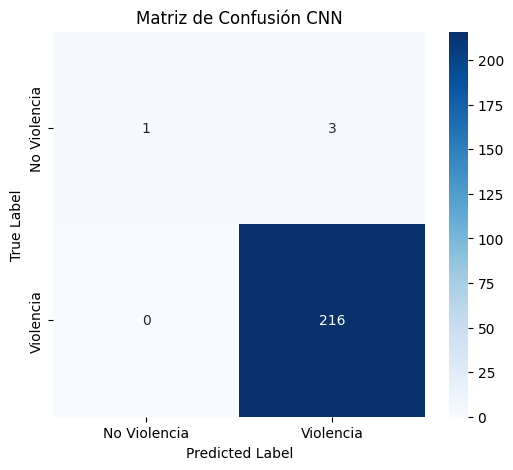

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix
import seaborn as sns

# Curva ROC
y_pred_prob_cnn = model_cnn.predict(X_test_cnn)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_cnn)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {roc_auc_cnn:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC CNN')
plt.legend()
plt.grid(True)
plt.show()

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_cnn)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Violencia', 'Violencia'], yticklabels=['No Violencia', 'Violencia'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Matriz de Confusión CNN')
plt.show()
